编写实现灰度图像形态学中形态学梯度的函数。
形态学梯度是一种基本的图像处理操作，通过计算图像的膨胀和腐蚀之间的差值来突出图像中的边缘细节。形态学梯度的定义为膨胀结果减去腐蚀结果
```shell
Gradient=Dilation(image)−Erosion(image)
```

In [64]:
#!/usr/bin/python3 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [65]:
import job02alib as lib

def morphological_gradient(image, structuring_element):
    """
    计算形态学梯度
    :param image: 输入灰度图像，类型为numpy数组
    :param structuring_element: 结构元，类型为numpy数组
    :return: 形态学梯度图像
    """
    dilated = lib.grayscale_dilate(image, structuring_element, times=1)
    eroded = lib.grayscale_erode(image, structuring_element, times=1)
    gradient = dilated - eroded
    return gradient

def numpy_to_pil(image):
    """
    将numpy数组转换为PIL图像
    :param image: 输入numpy数组
    :return: PIL图像
    """
    return Image.fromarray(np.array(image).astype(np.uint8))


In [66]:
# 测试
root_path = '/root/DIVP_project/'
image_path_penny = "project03/images/licolnfrompenny.tif"

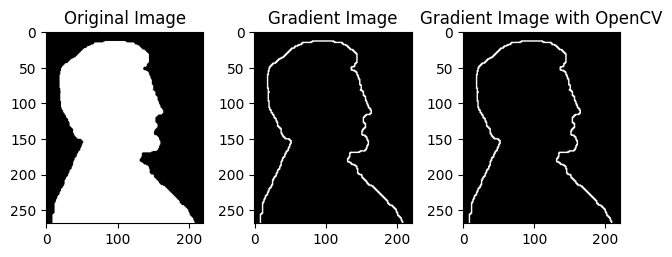

In [67]:
image_penny = Image.open(root_path + image_path_penny)
image_penny = image_penny.convert('L')
image_penny = np.array(image_penny)
# 对penny图像进行形态学梯度运算
structuring_element = np.ones((3, 3), np.uint8)
gradient_penny = morphological_gradient(image_penny, structuring_element)
# 对penney 图像使用opencv的形态学梯度运算
gradient_penny_opencv = cv2.morphologyEx(image_penny, cv2.MORPH_GRADIENT, structuring_element)
# 显示原图与形态学梯度图像，进行对比
plt.figure()
plt.subplot(131)
plt.imshow(numpy_to_pil(image_penny), cmap='gray')
plt.title('Original Image')
plt.subplot(132)
plt.imshow(numpy_to_pil(gradient_penny), cmap='gray')
plt.title('Gradient Image')
plt.subplot(133)
plt.imshow(numpy_to_pil(gradient_penny_opencv), cmap='gray')
plt.title('Gradient Image with OpenCV')
plt.tight_layout()
plt.show()



Top-hat（高帽）变换是一种形态学操作，通常用于提取比背景亮的区域。这种操作可以帮助检测图像中的亮斑，并突出局部亮度特征。Top-hat运算的定义是**图像与其开运算结果的差值**，即：
```shell
Top-hat=Original Image−Opening
```

In [68]:

def tophat_transform(image, structuring_element, times=1):
    """
    计算Top-hat变换
    :param image: 输入灰度图像，类型为numpy数组
    :param structuring_element: 结构元，类型为numpy数组
    :return: Top-hat变换后的图像
    """
    opened_image = lib.grayscale_open(image, structuring_element, times)
    tophat_image = image - opened_image
    return tophat_image

In [69]:
image_path_rice = "project03/images/ckt_board_section.tif"
image_rice = Image.open(root_path + image_path_rice)
image_rice = image_rice.convert('L')
image_rice = np.array(image_rice)

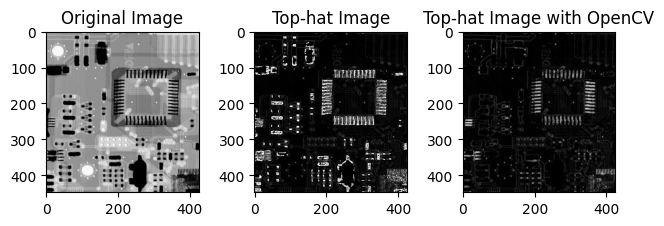

In [70]:
structuring_element = np.ones((3, 3), np.uint8)
# 对rice图像进行Top-hat变换
tophat_rice = tophat_transform(image_rice, structuring_element, times=3)

# 对rice图像使用opencv的Top-hat变换
tophat_rice_opencv = cv2.morphologyEx(image_rice, cv2.MORPH_TOPHAT, structuring_element, iterations=3)


# 显示原图与Top-hat变换后的图像，进行对比
plt.figure()
plt.subplot(131)
plt.imshow(numpy_to_pil(image_rice), cmap='gray')
plt.title('Original Image')
plt.subplot(132)
plt.imshow(numpy_to_pil(tophat_rice), cmap='gray')
plt.title('Top-hat Image')
plt.subplot(133)
plt.imshow(numpy_to_pil(tophat_rice_opencv), cmap='gray')
plt.title('Top-hat Image with OpenCV')
plt.tight_layout()
plt.show()